In [1]:
# logistic regression

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('C:/Users/PRIYANSHU SHARMA/Desktop/PRIYANSHU/6 STUDY/6 SEMSTER/MACHINE LEARNING/LAB/breast.csv')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
colnames=['ID', 'RADIUS', 'TEXTURE', 'PERIMETER', 'AREA', 'SMOOTHNESS', 'COMPACTNESS', 'CONCAVITY', 'CONCAVE', 'SYMMETRY', 'FRACTAL']
data = pd.read_csv('C:/Users/PRIYANSHU SHARMA/Desktop/PRIYANSHU/6 STUDY/6 SEMSTER/MACHINE LEARNING/LAB/breast.csv', names=colnames, header=None)

In [5]:
data.head()

,ID,RADIUS,TEXTURE,PERIMETER,AREA,SMOOTHNESS,COMPACTNESS,CONCAVITY,CONCAVE,SYMMETRY,FRACTAL
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
print(data.columns)

Index(['ID', 'RADIUS', 'TEXTURE', 'PERIMETER', 'AREA', 'SMOOTHNESS',
       'COMPACTNESS', 'CONCAVITY', 'CONCAVE', 'SYMMETRY', 'FRACTAL'],
      dtype='object')


In [7]:
data.describe()

,ID,RADIUS,TEXTURE,PERIMETER,AREA,SMOOTHNESS,COMPACTNESS,CONCAVITY,CONCAVE,SYMMETRY,FRACTAL
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

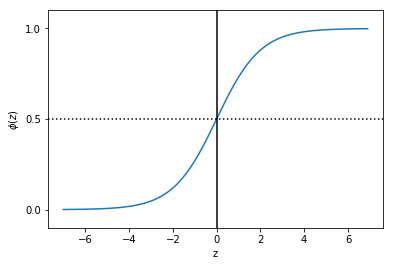

In [9]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [10]:
from sklearn.cross_validation import train_test_split
X = data.iloc[0:, [1,5]].values

C:\Users\PRIYANSHU SHARMA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X

array([[5, 2],
       [5, 7],
       [3, 2],
       ..., 
       [5, 7],
       [4, 3],
       [4, 4]], dtype=int64)

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,data['FRACTAL'], test_size=0.3, random_state=0)

In [13]:
col=['COMPACTNESS','SMOOTHNESS']

In [14]:
#For visualization

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label='Benign' if cl == 2 else 'Malignant')

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\PRIYANSHU SHARMA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, Y_train)
print("Accuracy on the training set: %.3f" % lr.score(X_train,Y_train))
print("Accuracy on the testing set: %.3f" % lr.score(X_test,Y_test))

Accuracy on the training set: 0.339
Accuracy on the testing set: 0.357


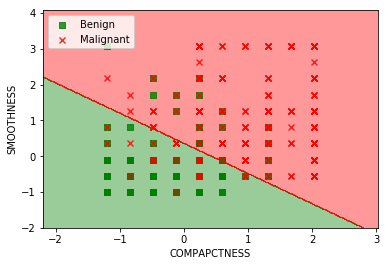

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X_combined_std,y_combined, classifier=lr)
plt.xlabel('COMPAPCTNESS')
plt.ylabel('SMOOTHNESS')
plt.legend(loc='upper left')
plt.show()